## Discretisation plus Encoding (Rời rạc hóa sử dụng mã hóa)

Chúng ta sẽ làm gì với biến sau khi rời rạc hóa? Có nên dùng bucket làm biến số không? Hay chúng ta nên sử dụng khoảng làm biến hạng mục?

Câu trả lời là, chúng ta có thể thực hiện một trong hai.

Nếu chúng ta đang xây dựng các thuật toán dựa trên decision tree (DT) và đầu ra của rời rạc hóa là số nguyên (mỗi số nguyên tham chiếu đến một bin), thì chúng ta có thể sử dụng chúng trực tiếp vì DT sẽ chọn ra các mối quan hệ phi tuyến tính giữa biến rời rạc hóa và mục tiêu.

Thay vào đó, nếu chúng ta đang xây dựng mô hình tuyến tính thì các bin không nhất thiết phải giữ mối quan hệ tuyến tính với mục tiêu. Trong trường hợp này, nó giúp cải thiện chất lượng mô hình, coi bin là hạng mục và mã hóa one-hot hoặc mã hóa có hướng dẫn mục tiêu như mã hóa trung bình, trọng số bằng chứng hoặc mã hóa thứ tự có hướng dẫn mục tiêu.

Chúng ta có thể dễ dàng thực hiện bằng cách kết hợp các bộ mã hóa và rời rạc hóa của feature-engine.


## Trong bản mô phỏng này

Chúng ta sẽ thực hiện rời rạc hóa sử dụng tần số bằng nhau, sau đó là mã hóa thứ tự có hướng dẫn mục tiêu, sử dụng tập dữ liệu Titanic.

Thay vào đó, nếu muốn thực hiện trọng số bằng chứng hoặc mã hóa mục tiêu trung bình, chỉ cần thay thế bộ mã hóa của Feature-engine. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [2]:
# load tập dữ liệu Titanic

data = pd.read_csv('titanic.csv',
                   usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# Hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

Các biến age và fare chứa dữ liệu bị khuyết, chúng ta sẽ điền vào bằng cách trích xuất mẫu ngẫu nhiên của biến.

In [4]:
def impute_na(data, variable):

    df = data.copy()

    # lấy mẫu ngẫu nhiên
    df[variable + '_random'] = df[variable]

    # trích xuất mẫu ngẫu nhiên để điền na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas cần có các index tương tự để hợp nhất các tập dữ liệu
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [18]:
# thay NA ở cả tập huấn luyện và tập kiểm tra
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
X_train['age'] = impute_na(X_train,'age')
X_test['age'] = impute_na(X_test,'age')

X_train['fare'] = impute_na(X_train,'fare')
X_test['fare'] = impute_na(X_test,'fare')

<details><summary> Gợi ý </summary>

Sử dụng hàm ```impute_na()``` ở trên

</details>

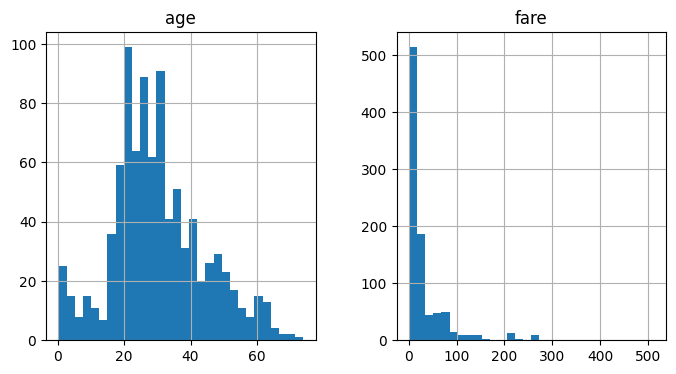

In [19]:
# hãy khám phá phân phối của age theo biểu đồ tần suất
## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:
X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

<details><summary> Gợi ý </summary>

[hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

</details>

## Equal frequency discretisation with Feature-Engine

In [20]:
# thiết lập bộ rời rạc hóa sử dụng khoảng cách bằng nhau
# để mã hóa các biến, cần trả về chúng ở dạng đối tượng với feature-engine

## Yêu cầu 3:
## VIẾT CODE Ở ĐÂY:
disc = EqualFrequencyDiscretiser(
    q=10, variables=['age', 'fare'], return_object=True)

# tìm các khoảng
disc.fit(X_train)

# biến đổi train và test
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

<details><summary> Gợi ý </summary>

[EqualFrequencyDiscretiser()](https://feature-engine.readthedocs.io/en/latest/discretisation/EqualFrequencyDiscretiser.html)

</details>

In [21]:
train_t.dtypes

age     object
fare    object
dtype: object

In [22]:
train_t.head()

,age,fare
501,0,5
588,0,6
402,5,4
1193,2,1
686,2,1


Text(0, 0.5, 'mean of survived')

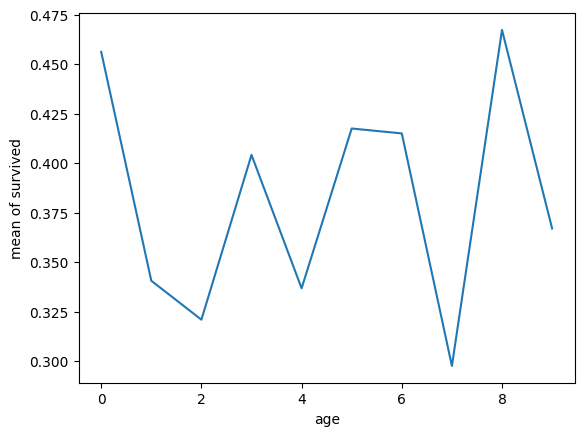

In [23]:
# hãy khám phá xem các bin có mối quan hệ tuyến tính
# với mục tiêu không:

## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:
pd.concat([train_t, y_train], axis=1).groupby('age')['survived'].mean().plot()
plt.ylabel('mean of survived')

<details><summary> Gợi ý </summary>

[concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

</details>

Text(0, 0.5, 'mean of survived')

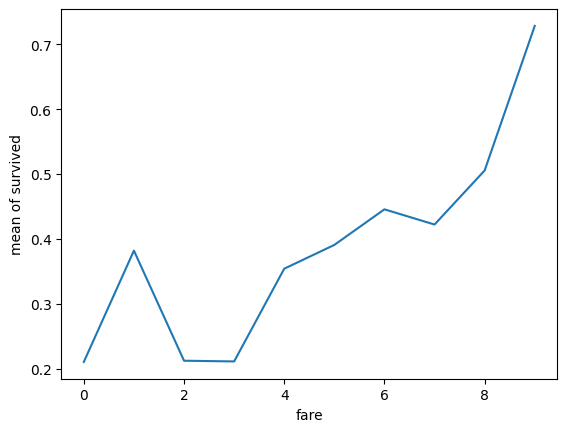

In [24]:
## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:

pd.concat([train_t, y_train], axis=1).groupby('fare')['survived'].mean().plot()
plt.ylabel('mean of survived')

Không có biến nào thể hiện mối quan hệ đơn điệu giữa các khoảng của biến rời rạc và giá trị trung bình của survival. Chúng ta có thể mã hóa các khoảng để trả về một mối quan hệ đơn điệu:

# Mã hóa thứ tự với Feature-Engine

In [25]:
## Yêu cầu 5:
## VIẾT CODE Ở ĐÂY:
enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

<details><summary> Gợi ý </summary>

[OrdinalEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

</details>

In [26]:
# chúng ta ánh xạ bin tới vị trí

enc.encoder_dict_

{'age': {7: 0, 2: 1, 4: 2, 1: 3, 9: 4, 3: 5, 6: 6, 5: 7, 0: 8, 8: 9},
 'fare': {0: 0, 3: 1, 2: 2, 4: 3, 1: 4, 5: 5, 7: 6, 6: 7, 8: 8, 9: 9}}

Text(0, 0.5, 'mean of survived')

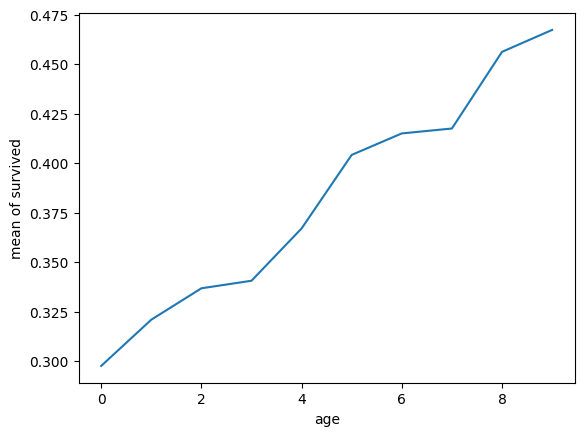

In [27]:
## Yêu cầu 6:
## VIẾT CODE Ở ĐÂY:
pd.concat([train_t, y_train], axis=1).groupby('age')['survived'].mean().plot()
plt.ylabel('mean of survived')

Text(0, 0.5, 'mean of survived')

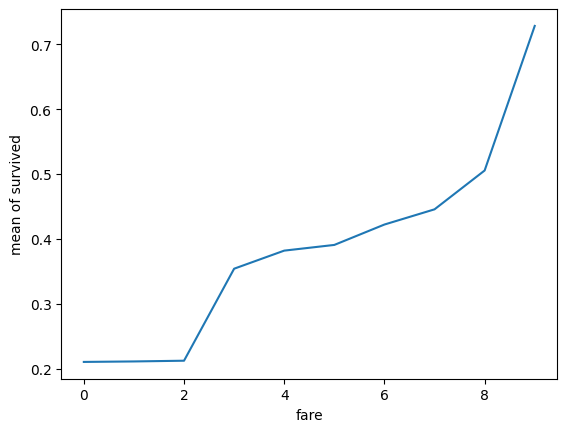

In [28]:
## Yêu cầu 7:
## VIẾT CODE Ở ĐÂY:
pd.concat([train_t, y_train], axis=1).groupby('fare')['survived'].mean().plot()
plt.ylabel('mean of survived')

Bây giờ chúng ta thu được một mối quan hệ đơn điệu giữa các biến và mục tiêu.